In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt



# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashantkubsad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prashantkubsad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset


In [4]:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [5]:
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [6]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [33]:
def get_feature_vector_bow(train_fit):
    vector = CountVectorizer(ngram_range=(1,1))
    vector.fit(train_fit)
    return vector

In [7]:
def int_to_string(sentiment):
    if sentiment == 0:
        return "Negative"
    elif sentiment == 2:
        return "Neutral"
    else:
        return "Positive"

In [8]:
# display(dataset)

# Load dataset
dataset = load_dataset("data/training.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
# Remove unwanted columns from dataset
n_dataset = remove_unwanted_cols(dataset, ['t_id', 'created_at', 'query', 'user'])
#Preprocess data
dataset.text = dataset['text'].apply(preprocess_tweet_text)
# Split dataset into Train, Test

# Same tf vector will be used for Testing sentiments on unseen trending data
tf_vector = get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
y = np.array(dataset.iloc[:, 0]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

0.768521875
0.787696875


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


alpha:  0.0 accuracy:  0.75344375
alpha:  0.1 accuracy:  0.758434375
alpha:  0.2 accuracy:  0.76111875
alpha:  0.3 accuracy:  0.762990625
alpha:  0.4 accuracy:  0.7644875
alpha:  0.5 accuracy:  0.765525
alpha:  0.6 accuracy:  0.76621875
alpha:  0.7 accuracy:  0.7668875
alpha:  0.8 accuracy:  0.7675125
alpha:  0.9 accuracy:  0.768034375
alpha:  1.0 accuracy:  0.768521875
alpha:  2 accuracy:  0.771090625
alpha:  3 accuracy:  0.77195625
alpha:  4 accuracy:  0.772075
alpha:  5 accuracy:  0.7723625
alpha:  6 accuracy:  0.772471875
alpha:  10 accuracy:  0.772459375
alpha:  15 accuracy:  0.772553125
alpha:  20 accuracy:  0.7719625


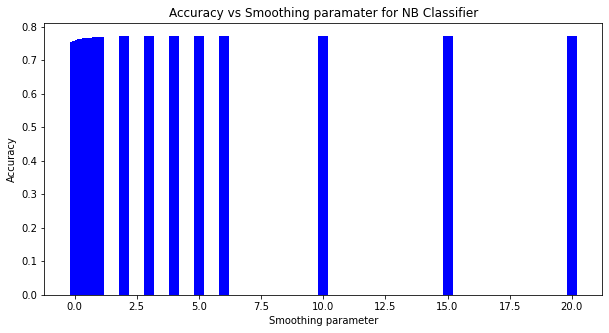

In [22]:
alphas = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,10,15,20]
accuracies = []
# Training Naive Bayes model
for alpha in alphas:
    NB_model = MultinomialNB(alpha=alpha)
    NB_model.fit(X_train, y_train)
    y_predict_nb = NB_model.predict(X_test)
    accuracy=accuracy_score(y_test, y_predict_nb)
    print("alpha: ",alpha, "accuracy: ",accuracy)
    accuracies.append(accuracy)
    

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(alphas, accuracies, color ='blue',
        width = 0.4)
 
plt.xlabel("Smoothing parameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Smoothing paramater for NB Classifier")
plt.show()


In [28]:
classes=[]
final_accuracy = []
classes.append("tf-idf, NB, alpha=15")
NB_model = MultinomialNB(alpha=15)
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
accuracy_nb_final=accuracy_score(y_test, y_predict_nb)
print(accuracy_nb_final)
final_accuracy.append(accuracy_nb_final)

0.772553125


In [31]:
# Training Logistics Regression model
classes.append("tf-idf, LR, solver=lbfgs")
LR_model = LogisticRegression(solver='lbfgs',max_iter=500)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
accuracy_lr_final=accuracy_score(y_test, y_predict_lr)
print(accuracy_lr_final)
final_accuracy.append(accuracy_lr_final)


0.788209375


In [34]:
# display(dataset)

# Load dataset
dataset = load_dataset("data/training.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
# Remove unwanted columns from dataset
n_dataset = remove_unwanted_cols(dataset, ['t_id', 'created_at', 'query', 'user'])
#Preprocess data
dataset.text = dataset['text'].apply(preprocess_tweet_text)
# Split dataset into Train, Test

# Same tf vector will be used for Testing sentiments on unseen trending data
bow_vector = get_feature_vector_bow(np.array(dataset.iloc[:, 1]).ravel())
X = bow_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
y = np.array(dataset.iloc[:, 0]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)



In [35]:
# Training Naive Bayes model
classes.append("bow, NB, alpha=15")
NB_model = MultinomialNB(alpha=15.0)
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
accuracy_nb_final=accuracy_score(y_test, y_predict_nb)
print("bow, nb->",accuracy_nb_final)
final_accuracy.append(accuracy_nb_final)

# Training Logistics Regression model
classes.append("bow, LR, solver=lbfgs")
LR_model = LogisticRegression(solver='lbfgs',max_iter=500)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
accuracy_lr_final=accuracy_score(y_test, y_predict_lr)
print("bow, lr-->",accuracy_lr_final)
final_accuracy.append(accuracy_lr_final)

bow, nb-> 0.773078125
bow, lr--> 0.78565


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.772553125, 0.787696875, 0.788209375, 0.773078125, 0.78565]
['tf-idf, NB, alpha=15', 'tf-idf, LR, solver=lbfgs', 'tf-idf, LR, solver=lbfgs', 'bow, NB, alpha=15', 'bow, LR, solver=lbfgs']


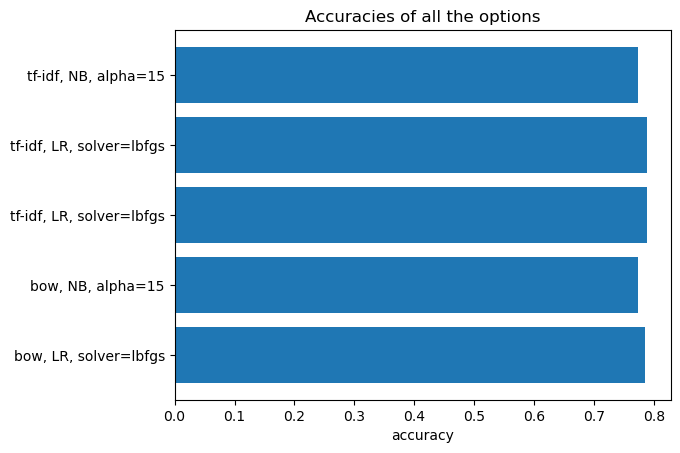

In [46]:
print(final_accuracy)
print(classes)
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(classes))


ax.barh(y_pos, final_accuracy,  align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(classes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('accuracy')
ax.set_title('Accuracies of all the options')

plt.show()

In [47]:
classes.append("tf-idf, LR, solver=lbfgs")
LR_model = LogisticRegression(solver='lbfgs',max_iter=500)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
accuracy_lr_final=accuracy_score(y_test, y_predict_lr)
print(accuracy_lr_final)
final_accuracy.append(accuracy_lr_final)

0.78565


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
actual_data=pd.read_excel('data/Tweets_CC_Filtered_En.xlsx',header=None) 
# display(actual_data[0])
# Creating text feature
test_ds = actual_data[0].apply(preprocess_tweet_text)
# print(test_ds.shape)
test_feature = tf_vector.transform(np.array(test_ds).ravel())
test_prediction_lr = LR_model.predict(test_feature)
# display(test_prediction_lr)
# print(type(test_prediction_lr))

negative_tweets_index=np.where(test_prediction_lr == 0)
positive_tweets_index=np.where(test_prediction_lr == 4)

# print("neagtive_tweets",negative_tweets)
# print("positive_tweets:",positive_tweets)

negative_tweets =  actual_data.iloc[negative_tweets_index] 
positive_tweets = actual_data.iloc[positive_tweets_index] 

negative_tweets.to_excel(r'data/Tweets_Negative_CC.xlsx',sheet_name='Negative_Tweets', index = False)
positive_tweets.to_excel(r'data/Tweets_Positive_CC.xlsx', sheet_name='Positive_Tweets',index = False)



number of negative tweets:                                                        0
10    RT @glbl301 : These are only a few instances, ...
12    Mike Luckovich at the Atlanta Journal-Constitu...
76    First time trying this and I can’t say that I ...
94    RT @ElAmerican_ : #CocaCola will be more expen...
102   #CocaCola will be more expensive due to the hi...
...                                                 ...
1334  #CocaCola STRUCK OUT on the #GeorgiaVotingLaw ...
1419  RT @pccote66 : #OnThisDay 04/23/85\n\n#CocaCol...
1457  #OnThisDay 04/23/85\n\n#CocaCola Changes its F...
1470  @USATODAY Weren't there 2 companies that staye...
1491  RT @schoene : we would like to see deliberate ...

[369 rows x 1 columns]
number of positive tweets:                                                       0
0     RT @OriginalFunko : This Pop! is sure to be th...
1     RT @PhillipsA535 : PLEASE SUPPORT companies th...
2     RT @youth_reclaim : Holly Hobbie Christmas Is ...
3     Beverage giant join

<320000x443522 sparse matrix of type '<class 'numpy.float64'>'
	with 2361223 stored elements in Compressed Sparse Row format>

  (0, 364132)	0.42644714183266574
  (0, 349894)	0.41769462130923357
  (0, 328642)	0.39981402559540785
  (0, 191824)	0.23662177442850596
  (0, 141596)	0.27453671651991435
  (0, 80734)	0.31228838212326554
  (0, 70446)	0.18746059745965948
  (0, 49170)	0.28151707480770655
  (0, 26987)	0.2619860098819319
  (0, 18624)	0.268157544452524
  (1, 317180)	0.3530760692263398
  (1, 221551)	0.4716324285048944
  (1, 163944)	0.4991100219081309
  (1, 155007)	0.3055886306443116
  (1, 95435)	0.5571399434379589
  (2, 422999)	0.5051839455473083
  (2, 330799)	0.47125740202777594
  (2, 140226)	0.7229838464276263
  (3, 391327)	0.5310464845380448
  (3, 391321)	0.5994834234045007
  (3, 216230)	0.2526875628971035
  (3, 213652)	0.37638636435171446
  (3, 193086)	0.23392450635881967
  (3, 26732)	0.31364132689269075
  (4, 228714)	0.5446455329776886
  :	:
  (319995, 296066)	0.2515788751771113
  (319995, 253110)	0.18089748426014476
  (319995, 248109)	0.3842407316787909
  (319995, 220134)	0.17044440073135522
  (319995, 